# Dowsing

In [33]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# data: W L W W W L W L W -> 6 W out of 9 probes
# if p = 0.5, what are the odds that for n = 9 probes, N_W = 6?
binom.pmf(6,9,0.5)

0.16406250000000006

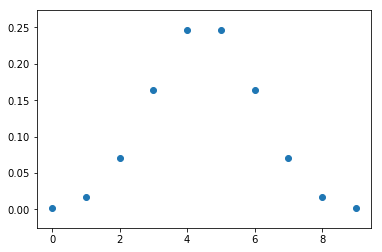

In [36]:
# what if we let w vary between 1 and 9?
# plot N_W vs. odds of getting N_W after 9 probes

In [73]:
# Let's analyze the situation where we allow for p (water coverage) to range between 0 and 1
# (because we don't know the true value of p)
# Here we should get 20 possible values for p. What's missing?
pvals=np.linspace(0,1,steps)
print(pvals)

[ 0.          0.05263158  0.10526316  0.15789474  0.21052632  0.26315789
  0.31578947  0.36842105  0.42105263  0.47368421  0.52631579  0.57894737
  0.63157895  0.68421053  0.73684211  0.78947368  0.84210526  0.89473684
  0.94736842  1.        ]


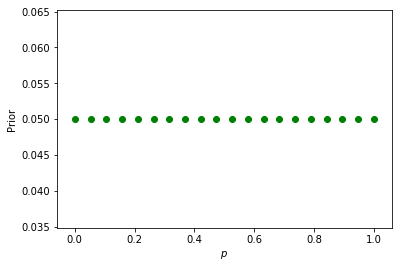

In [80]:
# Now we set the prior probability for each of those possible values for p (water coverage)
# We don't know anything in advance, so we give every possibility equal weight
prior=np.ones(len(pvals))
# It's not terribly important in this case, but the prior can be normalized easily
prior=prior/prior.sum()
# Let's plot this prior now

In [87]:
# Let's send one probe. Say it landed on water (W).
# We calculate the likelihood that:
# for each possible value of p (water coverage)
# we get N_W = 1
# after sending 1 probe
likelihood=binom.pmf(1,1,pvals)

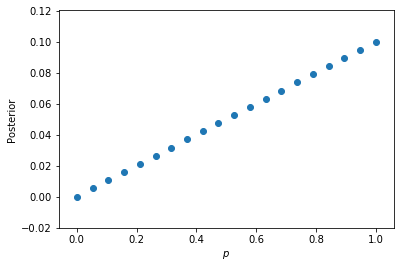

In [90]:
# Bayes' rule tells us: posterior \propto likelihood*prior
posterior=likelihood*prior
# Fortunately it can be easy to normalize
posterior=posterior/posterior.sum()
# Now let's plot the posterior

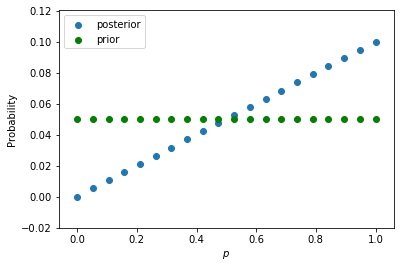

In [79]:
# Let's plot the posterior and the prior together so we can see how a new measurement updated our knowledge

In [91]:
# Let's send another probe. Say it landed on land (W L).
# Now we calculate the *updated* likelihood that:
# for each possible value of p (water coverage)
# we get N_W = 1
# after sending two probes
likelihood=binom.pmf(1,2,pvals)

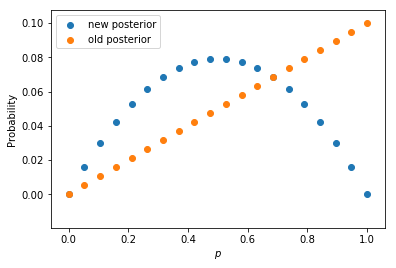

In [92]:
# Now let's plot the updated posterior and the old posterior (both normalized)
oldp=posterior
posterior=likelihood*prior
posterior=posterior/posterior.sum()

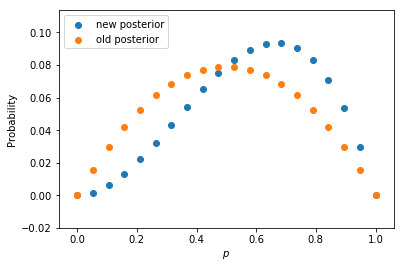

In [93]:
# Let's send a third probe. It landed on water (W L W).
# Now we calculate the *updated* likelihood that:
# for each possible value of p (water coverage)
# we get N_W = 2
# after sending three probes
# Now let's plot the updated posterior and the old posterior (both normalized)

In [ ]:
# Let's cut to the chase. We have sent 9 probes and the data is W L W W L W L W
# Now we calculate the *updated* likelihood that:
# for each possible value of p (water coverage)
# we get N_W = 6
# after sending *nine* probes
# Now let's plot the updated posterior and the old posterior (both normalized)

# Maximum Likelihood estimation

In [96]:
from scipy.optimize import minimize

In [97]:
likef= lambda x : -binom.pmf(6,9,x)

In [99]:
op=minimize(likef,[0.1])

In [100]:
op.x # w/n

array([ 0.66666666])

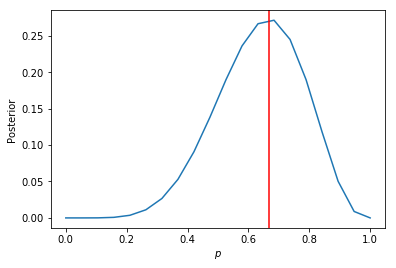

In [102]:
plt.plot(pvals,posterior)
plt.axvline(op.x,c='r')
plt.xlabel('$p$')
plt.ylabel('Posterior')

In [ ]:
# what if we got 200 w out of 300 throws?